### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [148]:
data = pd.read_csv('data/coupons.csv')

In [149]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

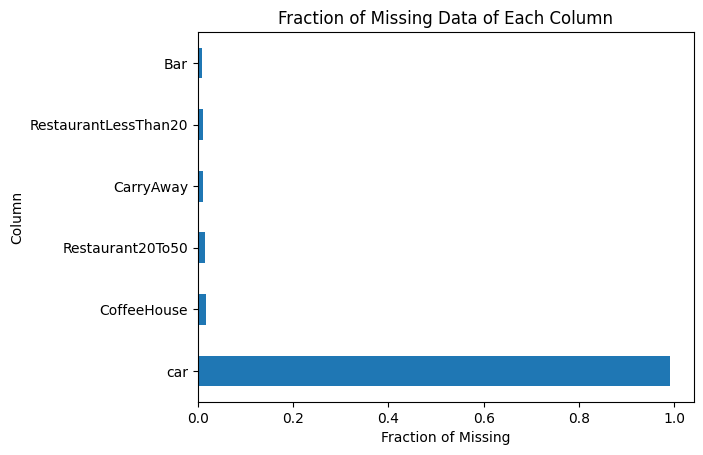

In [151]:
# We check percent missing data in this data set
missing_percent = data.isna().sum().sort_values(ascending=False)/len(data)
missing_percent[missing_percent != 0].plot(kind='barh');
plt.title('Fraction of Missing Data of Each Column')
plt.ylabel('Column');
plt.xlabel('Fraction of Missing');

In [152]:
missing_percent

car                     0.991485
CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
destination             0.000000
passanger               0.000000
direction_opp           0.000000
direction_same          0.000000
toCoupon_GEQ25min       0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ5min        0.000000
income                  0.000000
occupation              0.000000
education               0.000000
has_children            0.000000
maritalStatus           0.000000
age                     0.000000
gender                  0.000000
expiration              0.000000
coupon                  0.000000
time                    0.000000
temperature             0.000000
weather                 0.000000
Y                       0.000000
dtype: float64

**Comment**:
- The car columns has a lot of missing value, so it would be better if we drop this column.
- Let assume the RestaurantLessThan20 Frequency is the same as CoffeeHouse/Restaurant20To50/CarryAway. However, it's not reasonable to be same as Bar freq.
- Let replace missing value of CarryAway with CoffeeHouse freq and vice versa, and drop NaN row in Bar column.
- Finally, get rid small NaN row of RestaurantLessThan20.

In [153]:
data = data.drop(columns=['car']);
data = data.dropna(subset=['Bar']);
data = data.dropna(subset=['RestaurantLessThan20']);
data = data.dropna(subset=['RestaurantLessThan20']);

In [154]:
carryCoffee_fill = data['RestaurantLessThan20'];
data['CarryAway'] = data['CarryAway'].fillna(carryCoffee_fill);
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(carryCoffee_fill);
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(carryCoffee_fill);

In [155]:
missing_percent = data.isna().sum().sort_values(ascending=False)/len(data);
missing_percent

destination             0.0
income                  0.0
direction_opp           0.0
direction_same          0.0
toCoupon_GEQ25min       0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ5min        0.0
Restaurant20To50        0.0
RestaurantLessThan20    0.0
CarryAway               0.0
CoffeeHouse             0.0
Bar                     0.0
occupation              0.0
passanger               0.0
education               0.0
has_children            0.0
maritalStatus           0.0
age                     0.0
gender                  0.0
expiration              0.0
coupon                  0.0
time                    0.0
temperature             0.0
weather                 0.0
Y                       0.0
dtype: float64

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12489 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12489 non-null  object
 1   passanger             12489 non-null  object
 2   weather               12489 non-null  object
 3   temperature           12489 non-null  int64 
 4   time                  12489 non-null  object
 5   coupon                12489 non-null  object
 6   expiration            12489 non-null  object
 7   gender                12489 non-null  object
 8   age                   12489 non-null  object
 9   maritalStatus         12489 non-null  object
 10  has_children          12489 non-null  int64 
 11  education             12489 non-null  object
 12  occupation            12489 non-null  object
 13  income                12489 non-null  object
 14  Bar                   12489 non-null  object
 15  CoffeeHouse           12489 non-null  obj

4. What proportion of the total observations chose to accept the coupon?



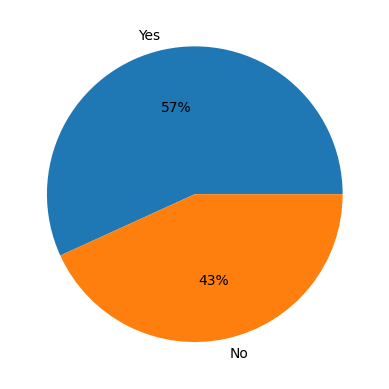

In [157]:
keys = ['Yes','No'];
data_pie = data[['Y']].value_counts();
plt.pie(data_pie, labels=keys, autopct='%.0f%%') ;

- There are 57% in the data set accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

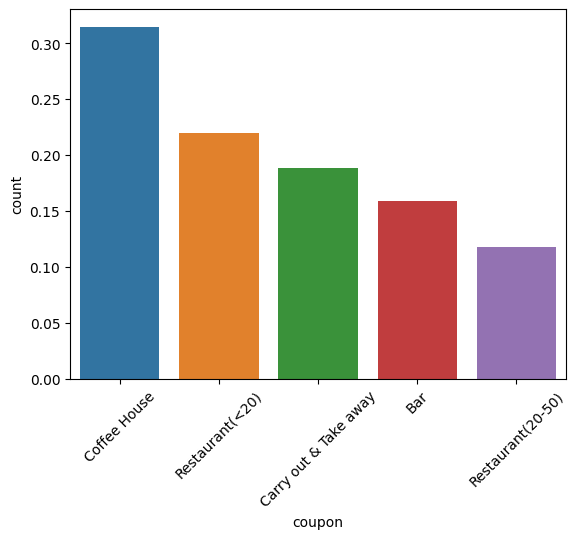

In [158]:
data_bar = pd.DataFrame(data[['coupon']].value_counts()/len(data)).reset_index();
sns.barplot(data_bar,x='coupon',y='count');
plt.xticks(rotation=45);

- It seems Coffee House coupon type dominate, followed by Restaurant (<20$), and Carryout/Take away.

6. Use a histogram to visualize the temperature column.

C:\Users\ducth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


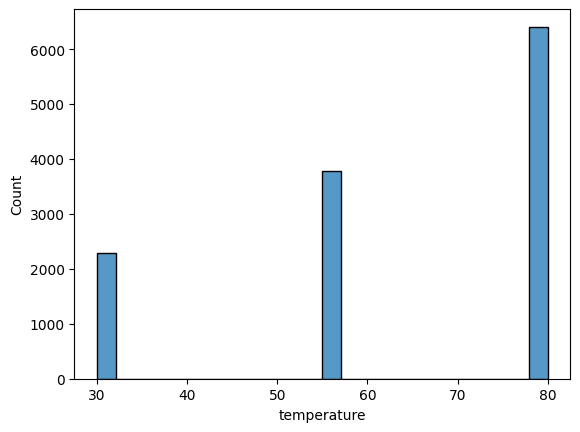

In [159]:
sns.histplot(data,x='temperature');

- In the data set, most observations has temperature at 80.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [160]:
bar_df = data[data['coupon']=='Bar'];
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


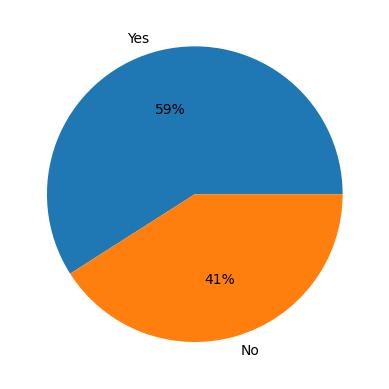

In [161]:
data_pie = bar_df[['Y']].value_counts();
plt.pie(data_pie, labels=['Yes','No'], autopct='%.0f%%') ;

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [162]:
bar_df['age'].value_counts()

age
21         407
26         392
31         329
50plus     281
36         206
41         171
46         109
below21     87
Name: count, dtype: int64

In [163]:
bar_fewer = bar_df[(bar_df['Bar']=='never')|(bar_df['Bar']=='less1')|(bar_df['Bar']=='1~3')];
bar_fewer_rate = bar_fewer['Y'].sum()/len(bar_fewer);
bar_fewer_rate

0.36960179472798654

- It seems people go to the bar fewer than 3 times/month has lower rate accept the bar coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [164]:
cond1 = (bar_df['Bar']!='never')|(bar_df['Bar']!='less1');
cond2 = (bar_df['age']!='21');
bar_morethanone_over25 = bar_df[cond1 & cond2];
bar_morethanone_over25_rate = bar_morethanone_over25['Y'].sum()/len(bar_morethanone_over25);
bar_morethanone_over25_rate

0.3853968253968254

- It seems people over 25 year old go the bar more than once a month has low rate accept bar coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [171]:
cond1 = (bar_df['Bar']!='never')|(bar_df['Bar']!='less1');
cond2 = (bar_df['passanger']!='Kid(s)');
cond3 = (bar_df['occupation']!='Farming Fishing & Forestry');
df_p5 = bar_df[cond1 & cond2 & cond3];
ans_rate5 = df_p5['Y'].sum()/len(df_p5);
ans_rate5

0.4326760563380282

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [176]:
bar_df['income'].value_counts()

income
$25000 - $37499     313
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     259
$50000 - $62499     254
Less than $12500    159
$75000 - $87499     147
$87500 - $99999     142
$62500 - $74999     129
Name: count, dtype: int64

In [172]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed
cond1 = (bar_df['Bar']!='never')|(bar_df['Bar']!='less1');
cond2 = (bar_df['passanger']!='Kid(s)');
cond3 = (bar_df['maritalStatus']!='Widowed');
df_p6a = bar_df[cond1 & cond2 & cond3];
ans_rate6a = df_p6a['Y'].sum()/len(df_p6a);
ans_rate6a

0.4340909090909091

In [173]:
#go to bars more than once a month and are under the age of 30
cond1 = (bar_df['Bar']!='never')|(bar_df['Bar']!='less1');
cond2 = (bar_df['age']=='21') | (bar_df['age']=='26')
df_p6b = bar_df[cond1 & cond2];
ans_rate6b = df_p6b['Y'].sum()/len(df_p6b);
ans_rate6b

0.49436795994993743

In [177]:
#go to cheap restaurants more than 4 times a month and income is less than 50K.
cond1 = (bar_df['RestaurantLessThan20']!='never')|(bar_df['RestaurantLessThan20']!='less1')|(bar_df['RestaurantLessThan20']!='1~3');
list_income = ['Less than $12500','$25000 - $37499','$12500 - $24999','$37500 - $49999'];
cond2 = (bar_df['income'].isin(list_income));
df_p6c = bar_df[cond1 & cond2];
ans_rate6c = df_p6c['Y'].sum()/len(df_p6c);
ans_rate6c

0.4151128557409225

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- Go to the bar more than once a month
- Income higher than 50K
- Passenger not kid(s)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  